In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage import color
from skimage.transform import resize

**Task 1a** Load the first image, resize it to (256, 256) and display it.

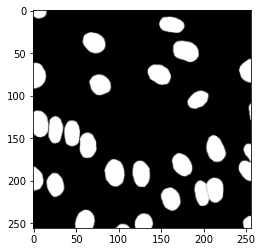

In [3]:
cell_img = imread(f'../data/NIH3T3/gt/0.png')[:, :1024]
cell_img = resize(cell_img, (256, 256))
imshow(cell_img, 'gray')

**Task 1b** Apply the fast Fourier transform and check the data type of the result.

In [4]:
cell_ft = numpy.fft.fft2(cell_img)
print(cell_ft.dtype)

complex128


**Task 1c** Extract the phase and amplitude and display them.

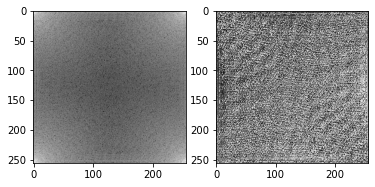

In [5]:
amplitude = numpy.abs(cell_ft)

phase = numpy.angle(cell_ft)

figure()
subplot(1, 2, 1)
imshow(numpy.log(amplitude), 'gray')
subplot(1, 2, 2)
imshow(phase, 'gray')

**Task 1d** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.

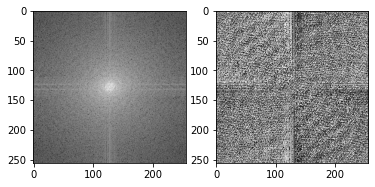

In [6]:
cell_ft_shift = numpy.fft.fftshift(cell_ft)

amplitude_cell = numpy.abs(cell_ft_shift)

phase_cell = numpy.angle(cell_ft_shift)

figure()
subplot(1, 2, 1)
imshow(numpy.log(amplitude_cell), 'gray')
subplot(1, 2, 2)
imshow(phase_cell, 'gray')

**Task 1e** Apply the inverse FFT and display the restored image.

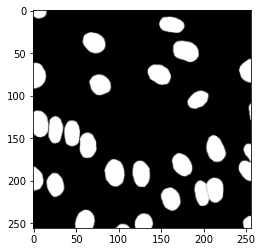

In [7]:
cell_restored = numpy.fft.ifft2(cell_ft)
imshow(cell_restored.real, 'gray')

---

**Task 2a** Load the image of Lena.

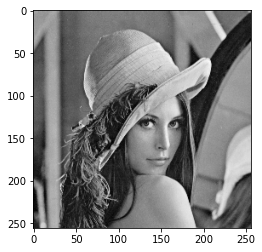

In [8]:
lena_img = imread(f'../data/lena.png')
imshow(lena_img, 'gray')

**Task 2b** Apply the FFT, do a shift, extract amplitude and phase.

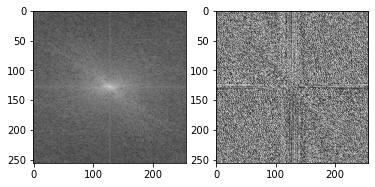

In [9]:
lena_ft = numpy.fft.fftshift(fft2(lena_img))
amplitude_lena = numpy.abs(lena_ft)
phase_lena = numpy.angle(lena_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(numpy.log(amplitude_lena), 'gray')
plt.subplot(1, 2, 2)
imshow(phase_lena, 'gray')

In [10]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * numpy.exp(1j * phase_array)

**Task 2c** Merge the amplitude of Lena and the phase of cells. Do the IFFT and display the resulting image.

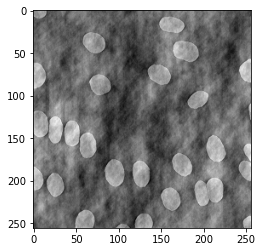

In [11]:
lena_with_cell_phase = to_complex_array(amplitude_lena, phase_cell)
mixed_1 = numpy.fft.ifft2(ifftshift(lena_with_cell_phase))
imshow(mixed_1.real, 'gray')

**Task 2d** Repeat this with the amplitude of the cells and the phase of Lena.

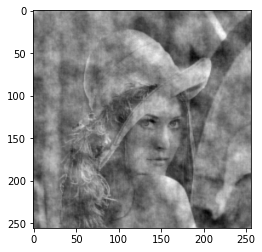

In [12]:
cell_with_lena_phase = to_complex_array(amplitude_cell, phase_lena)
mixed_2 = numpy.fft.ifft2(ifftshift(cell_with_lena_phase))
imshow(mixed_2.real, 'gray')

---

**Task 3a** Create a lowpass filter mask.

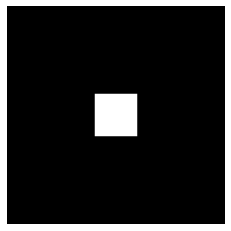

In [13]:
filter_window_size = 50
low_pass_mask = numpy.zeros(lena_img.shape)
n, m = low_pass_mask.shape
low_pass_mask[int(n/2-filter_window_size/2):int(n/2+filter_window_size/2), int(m/2-filter_window_size/2):int(m/2+filter_window_size/2)] = 1
plt.axis('off')
imshow(low_pass_mask, 'gray')

**Task 3b** Create a highpass filter maks.

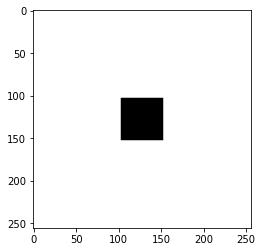

In [14]:
high_pass_mask = 1 - low_pass_mask
imshow(high_pass_mask, 'gray')

**Task 3c** Apply the lowpass and highpass filter mask to the amplitude of Lena and display the results.

<ipython-input-15-d8f050c26d39>:8: RuntimeWarning: divide by zero encountered in log
  imshow(numpy.log(low_pass_filtered_amplitude), 'gray')
<ipython-input-15-d8f050c26d39>:10: RuntimeWarning: divide by zero encountered in log
  imshow(numpy.log(high_pass_filtered_amplitude), 'gray')


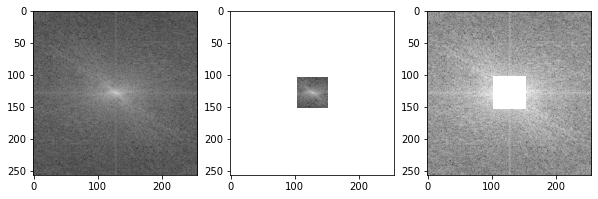

In [15]:
low_pass_filtered_amplitude = amplitude_lena * low_pass_mask
high_pass_filtered_amplitude = amplitude_lena * high_pass_mask

figure(figsize=(10,5))
subplot(1, 3, 1)
imshow(numpy.log(amplitude_lena), 'gray')
subplot(1, 3, 2)
imshow(numpy.log(low_pass_filtered_amplitude), 'gray')
subplot(1, 3, 3)
imshow(numpy.log(high_pass_filtered_amplitude), 'gray')

**Task 3d** Apply the mask to the amplitude, merge the result with the phase and restore the image.

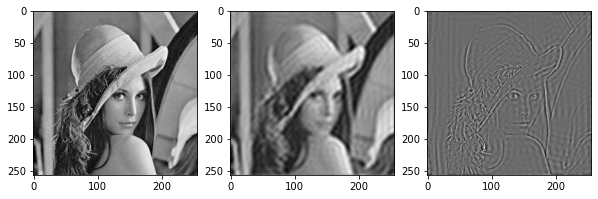

In [16]:
low_pass_ft = to_complex_array(low_pass_filtered_amplitude, numpy.angle(lena_ft))
high_pass_ft = to_complex_array(high_pass_filtered_amplitude, numpy.angle(lena_ft))

figure(figsize=(10,5))
subplot(1, 3, 1)
imshow(lena_img, 'gray')
subplot(1, 3, 2)
imshow(ifft2(ifftshift(low_pass_ft)).real, 'gray')
subplot(1, 3, 3)
imshow(ifft2(ifftshift(high_pass_ft)).real, 'gray')

---

**Task 4a** Implement a function that computes the 2D-DFT.

In [17]:
def dft2(img):
    m, n = img.shape
    dft = numpy.zeros(img.shape, dtype=complex)
    for u in range(m):
        for v in range(n):
            sum_u_v = 0.
            for x in range(m):
                for y in range(n):
                    sum_u_v += img[x, y] * numpy.exp(-2j * pi * (u*x/m + v*y/n))
            dft[u, v] = sum_u_v/(m*n)
    return dft

**Task 4b** Implement a function that computes the 2D-IDFT.

In [18]:
def idft2(img):
    m, n = img.shape
    idft = numpy.zeros(img.shape, dtype=complex)
    for u in range(m):
        for v in range(n):
            sum_u_v = 0.
            for x in range(m):
                for y in range(n):
                    sum_u_v += img[x, y] * numpy.exp(2j * pi * (u*x/m + v*y/n))
            idft[u, v] = sum_u_v
    return idft

Alternative:

In [19]:
def ft2(img, inverse=False):
    m, n = img.shape
    ft = numpy.zeros(img.shape, dtype=complex)
    for u in range(m):
        for v in range(n):
            sum_u_v = 0.
            for x in range(m):
                for y in range(n):
                    if inverse:
                        sum_u_v += img[x, y] * numpy.exp(2j * pi * (u*x/m + v*y/n))
                    else:
                        sum_u_v += img[x, y] * numpy.exp(-2j * pi * (u*x/m + v*y/n))
            ft[u, v] = sum_u_v if inverse else sum_u_v / m*n
    return ft

Due to high computational costs, we need to resize the image.

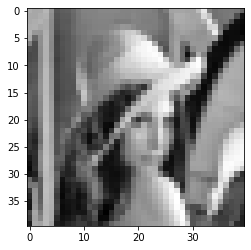

In [20]:
test_img = resize(lena_img, (40, 40))
imshow(test_img, 'gray')

**Task 4c** Apply your DFT implementation to the image and display amplitude and phase.

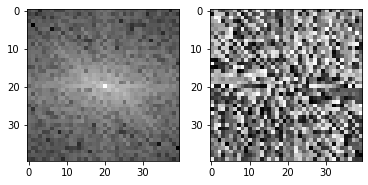

In [21]:
own_dft = dft2(test_img)
own_dft = numpy.fft.fftshift(own_dft)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(numpy.log(abs(own_dft)), 'gray')
plt.subplot(1, 2, 2)
imshow(numpy.angle(own_dft), 'gray')

**Task 4d** Reconstruct the image using your IDFT implementation and display it.

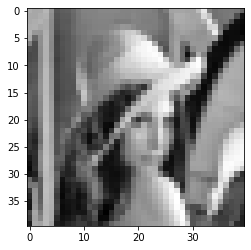

In [22]:
restored = idft2(numpy.fft.ifftshift(own_dft))
# restored = ft2(ifftshift(own_dft), True)
imshow(restored.real, 'gray')

In [23]:
print(numpy.allclose(test_img, restored))

True


**Task 4e** Compare your result to the result of numpy's FFT

If errorCheck: Numpy package version! 

For older versions: numpy.fft.fft2(test_img) is sufficient.

For newer versions (> 1.20.0): numpy.fft.fft2(test_img, norm='forward') is required.

In [24]:
print(numpy.__version__)

1.20.3


In [27]:
test_img = resize(lena_img, (40, 40))
numpy_fft = numpy.fft.fftshift(numpy.fft.fft2(test_img, norm='forward'))
print(numpy.allclose(own_dft, numpy_fft))

True


**Task 4f** Round the arrays and compare them again.

In [28]:
round_to_decimals = 9
rounded_own_dft = numpy.round(own_dft, round_to_decimals)
rounded_numpy_fft = numpy.round(numpy_fft, round_to_decimals)
print((rounded_own_dft == rounded_numpy_fft).all())
print(numpy.mean(numpy.abs(own_dft - numpy_fft)))

True
1.1097570151650696e-16


**Task 4g** Compare the run times of the two algorithms (your DFT and numpy's FFT)

In [29]:
%timeit dft2(test_img)

7.87 s ± 46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%timeit numpy.fft.fft2(test_img)

25.4 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
